In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Explore the Jobs dataset

A continuación vamos a proceder a realizar un análisis exploratorio del conjunto de datos **jobs**. Este conjunto de datos contiene el ratio de desempleo en USA en 16 industrias desde el año 2000 hasta el año 2010. Tenemos observaciones a nivel de mes, es decir para cada industria tenemos un total de 122 observacioes.

In [2]:
#Cargamos los datos
jobs = pd.read_csv('ch5_employment.csv', parse_dates = ['datestamp'], index_col = ['datestamp'])
jobs.head(3)

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1


In [3]:
#Comprobamos el número de valores nulos 
print(jobs.isnull().sum())

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64


# Describe time series data with boxplots

Una de las cosas que debemos realizar siempre es ver la distribución de nuestras variables, puesto que estamos trabajando con series temporales lo mejor es hacer uso de boxplots y de resúmenes estadísticos.

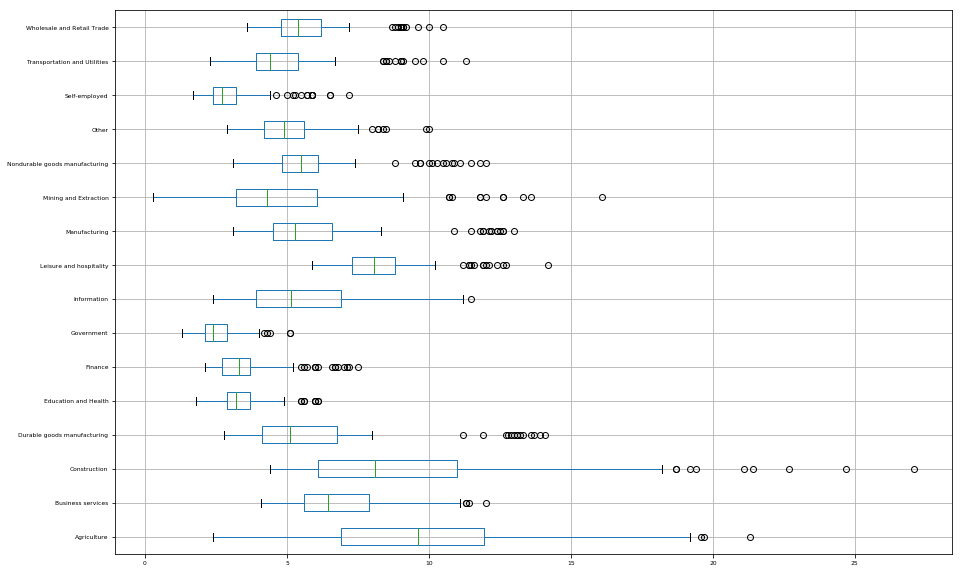

In [4]:
#Nos creamos los boxplots
jobs.boxplot(fontsize = 6, vert = False, figsize = (15,10))
plt.show()

In [5]:
#Mostramos la industria donde el promedio es mayor
print(jobs.mean()[jobs.mean() == jobs.mean().max()])

Agriculture    9.840984
dtype: float64


In [6]:
#Mostramos la industria que tenga una mayor variabilidad
print(jobs.std()[jobs.std() == jobs.std().max()])

Construction    4.587619
dtype: float64


# Plot all the time series in your dataset

Nuestro conjunto de datos dispone de un total de 16 series temporales, mostrar todas estas en un mismo gráfico posiblemente no sea una buena idea, ya que vamos a tener mucha información en un mismo gráfico. Lo mejor será representar cada una de las series temporales por separado.

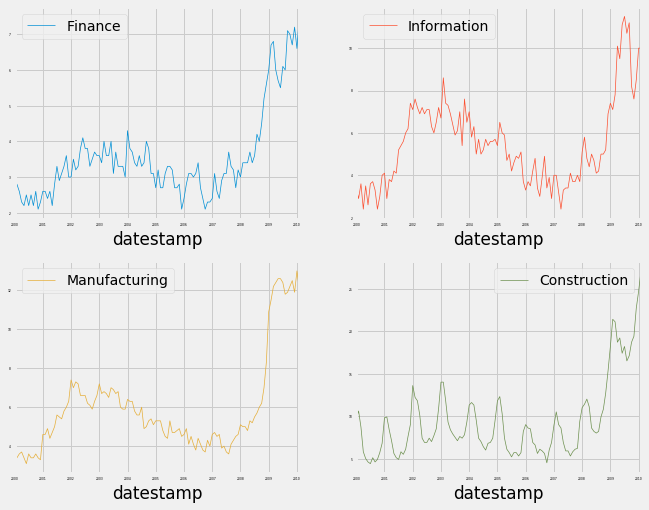

In [7]:
#Seleccionamos el estilo de visualización
plt.style.use('fivethirtyeight')

#Seleccionamos un subconjunto
jobs_subset = jobs.loc[:, ['Finance', 'Information', 'Manufacturing', 'Construction']]

#Visualizamos por separado cada una de nuestras series
ax = jobs_subset.plot(subplots = True,
                     layout = (2, 2),
                     figsize = (10,8),
                     sharex = False,
                     sharey = False,
                     linewidth = 0.7,
                     fontsize = 3,
                     legend = True)

plt.show()

# Annotate significant events in time series data

En las series temporales mostradas anteriormente podemos ver como entre los años 2001 y 2008 tenemos subidas y bajadas en la tasa de desempleo. Nuestros gráficos de serie temporal serán más descriptivos si agregamos anotaciones adicionales que enfaticen situaciones que nos interesen.

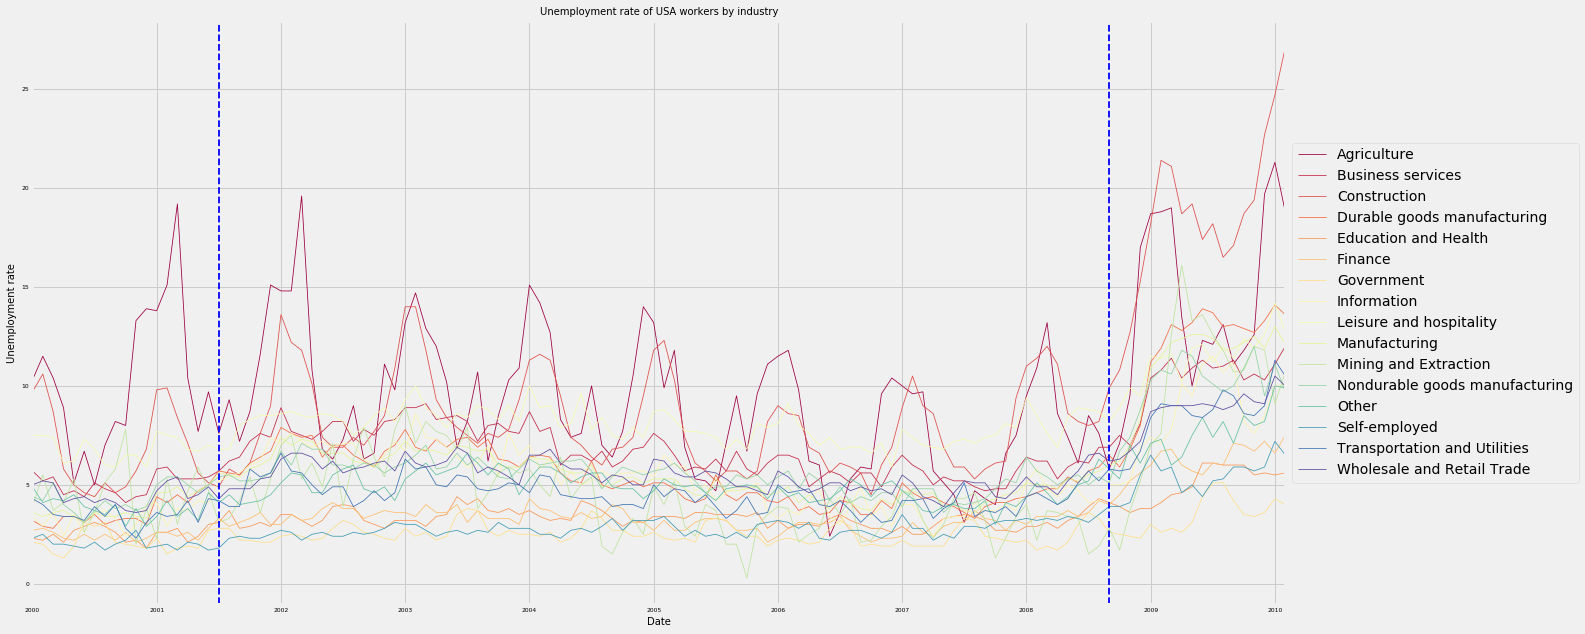

In [8]:
#Nos creamos un gráfico con todas las series temporales en un mismo gráfico
ax = jobs.plot(colormap = 'Spectral', fontsize = 6, linewidth = 0.8, figsize = (20,10))

#Renombramos los ejes y le ponemos título
ax.set_xlabel('Date', fontsize = 10)
ax.set_ylabel('Unemployment rate', fontsize = 10)
ax.set_title('Unemployment rate of USA workers by industry', fontsize = 10)

#Modificamos la leyenda
ax.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

#Agregamos línas en nuestras zonas de interés 
ax.axvline('2001-07-01', color = 'blue', linestyle = '--', linewidth = 1.8)
ax.axvline('2008-09-01', color = 'blue', linestyle = '--', linewidth = 1.8)

plt.show()

# Plot monthly and yearly trends

Cuando tenemos nuestra serie temporal indexado por tiempo y este es de tipo datetime64, podemos acceder a los meses, días años etc de forma sencilla.

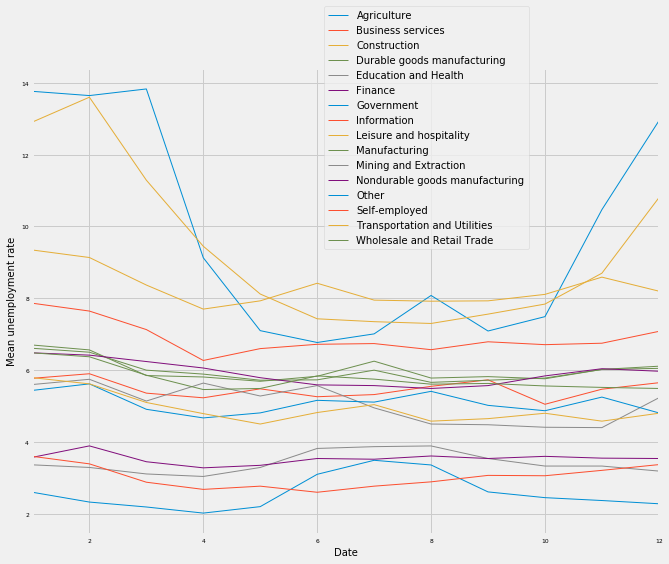

In [9]:
#Obtenemos los meses de nuestro conjunto de datos
index_month = jobs.index.month

#Calculamos la media de desempleo para cada una de las series a nivel mensual
jobs_by_month = jobs.groupby(index_month).mean()

#Nos creamos el gráfico 
ax = jobs_by_month.plot(fontsize = 6, linewidth = 1, figsize = (10,8))

#Nombramos los ejes
ax.set_xlabel('Date', fontsize = 10)
ax.set_ylabel('Mean unemployment rate', fontsize = 10)

#Modificamos la localización de la leyenda
ax.legend(bbox_to_anchor = (0.8, 0.6), fontsize = 10)

#Mostramos el resultado 
plt.show()

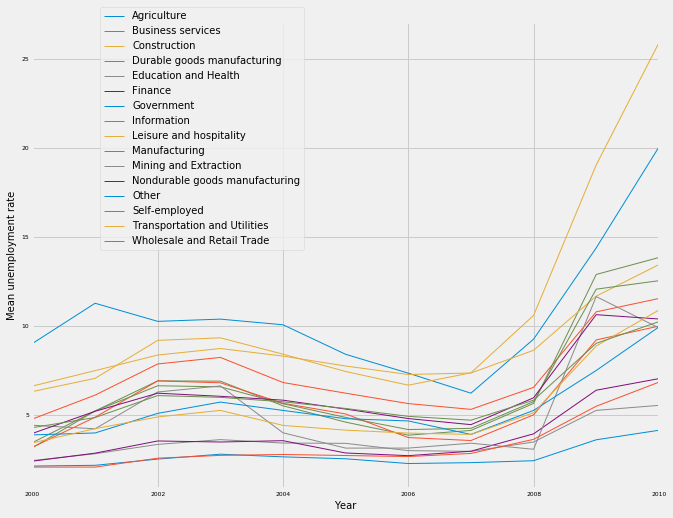

In [10]:
#Volvemos a realizar lo mismo pero a nivel anual
index_year = jobs.index.year

#Calculamos la media por industria a nivel anual
jobs_by_year = jobs.groupby(index_year).mean()

#Nos creamos el gráfico 
ax = jobs_by_year.plot(fontsize = 6, linewidth = 1, figsize = (10,8))

#Renombramos los ejes
ax.set_xlabel('Year', fontsize = 10)
ax.set_ylabel('Mean unemployment rate', fontsize = 10)

#Modificamos la leyenda
ax.legend(bbox_to_anchor = (0.1, 0.5), fontsize = 10)

plt.show()

# Apply time series decomposition to your dataset

Los diccionarios son unas de las herramientas más útiles de Python. Por ejemplo podemos crearnos un diccionario que almacene la descomposición de cada una de nuestras series temporales.

In [12]:
#Nos generamos el diccionario en el cuál queremos guardar nuestras descomposiciones
jobs_decomp = {}

for col in jobs.columns:
    jobs_decomp[col] = sm.tsa.seasonal_decompose(jobs[col])

# Visualize the seasonality of multiple time series

Una vez hemos descompuesta todas nuestras series temporales, podemos visualizar las componentes. Por ejemplo, podemos visualizar la componente estacional.

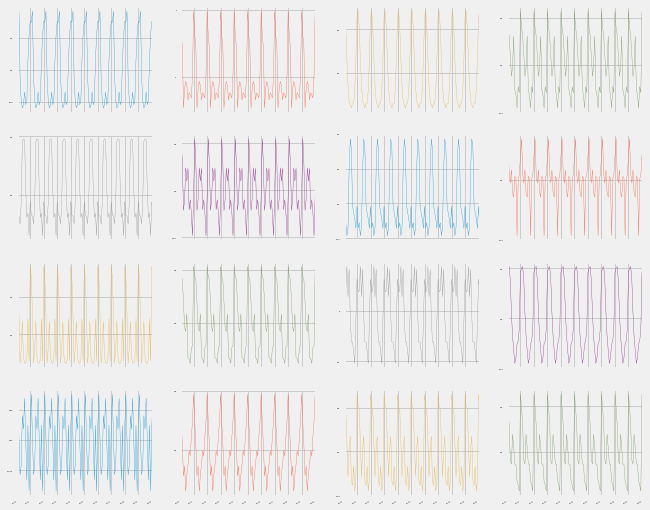

In [25]:
#Extraemos la componente estacional
jobs_seasonal = {}
for key in jobs_decomp.keys():
    jobs_seasonal[key] = jobs_decomp[key].seasonal

#Nos creamos un dataframe que contiene las componentes estacionales para cada una de las series temporales
jobs_seasonal_df = pd.DataFrame(jobs_seasonal)

#Eliminamos la etiqueta de los índices
jobs_seasonal_df.index.name = None

#Nos creamos el gráfico 
jobs_seasonal_df.plot(subplots = True,
                     layout = (4,4),
                     figsize = (10,10),
                     sharey = False,
                     fontsize = 2,
                     linewidth = 0.3,
                     legend = False)
#Vemos el resultado
plt.show()

# Correlations between multiple time series

La componente estacional se trata de una componente que nos puede ayudar a comparar dos series temporales, esta nos puede dar una idea de como se parecen entre sí dos series temporales. 

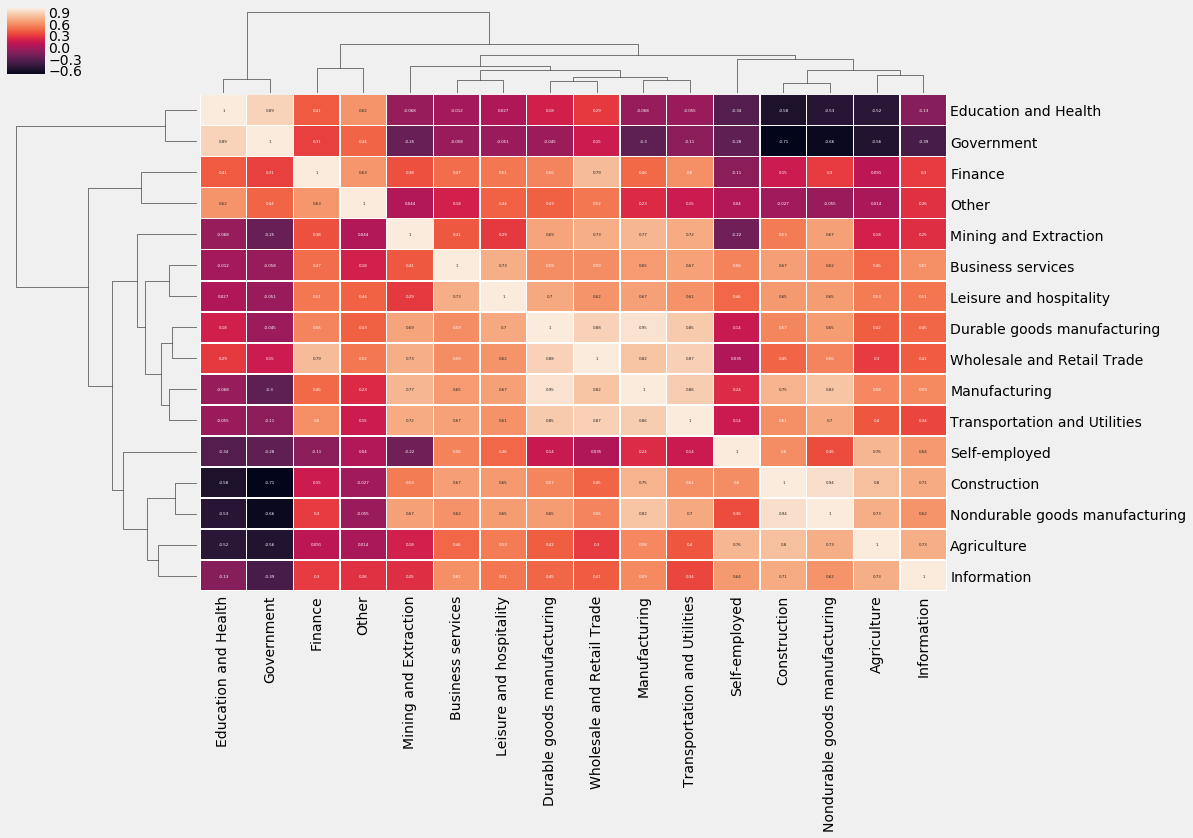

In [30]:
#Nos creamos nuestra matriz de correlación con el método de Spearman
seasonality_corr = jobs_seasonal_df.corr(method = 'spearman')

#Nos creamos nuestro gráfico de tipo clustermap 
fig = sns.clustermap(seasonality_corr, annot = True, annot_kws = {'size': 4}, linewidths = .4,
                           figsize = (15,10))

#Modificamos los ejes
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)

#Mostramos el resultado
plt.show()